In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests


# Get wikipedia page which contains postal codes for Toronto

In [2]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

# Create a BeautifulSoup object which will be used for parsing postal codes from web page

In [3]:
soup = BeautifulSoup(page.text, 'html.parser')

# loop through page for required tags

In [4]:
table_Toronto_zipinfo = soup.find('table')
colvals = table_Toronto_zipinfo.find_all('td')
elem_cnt = len(colvals)
postcode = []
borough = []
neighborhood = []

for i in range(0, elem_cnt, 3):
    postcode.append(colvals[i].text.strip())
    borough.append(colvals[i+1].text.strip())
    neighborhood.append(colvals[i+2].text.strip())


# build dataframe with only the required columns

In [5]:
df_Toronto_postcodes = pd.DataFrame(data=[postcode, borough, neighborhood]).transpose()
df_Toronto_postcodes.columns = ['Postcode', 'Borough', 'Neighborhood']


# clean the data by dropping rows where 'Borough' is not assigned

In [6]:
df_Toronto_postcodes.drop(df_Toronto_postcodes[df_Toronto_postcodes['Borough'] == 'Not assigned'].index, inplace=True) 

# if Borough exist but a Neighborhood does not exist then set the Neighborhood to have the same value as the Borough

In [7]:
df_Toronto_postcodes.loc[df_Toronto_postcodes.Neighborhood == 'Not assigned', 'Neighborhood'] = df_Toronto_postcodes.Borough

# group data where more than one Neighborhood has the same Postal Code

In [8]:
df_group_Toronto = df_Toronto_postcodes.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(', '.join).reset_index() 

In [9]:
#df_group_Toronto

In [10]:
df_group_Toronto.shape

(103, 3)

# Add postal codes and neighbourhood descriptions for additional communities in GTA (outside Toronto municipal boundaries)

In [11]:
other_gta_postcodes=[
{'Postcode': 'L5A', 'Borough': 'Mississauga', 'Neighborhood': 'Mississauga Valley / East Cooksville'},
{'Postcode': 'L5B', 'Borough': 'Mississauga', 'Neighborhood': 'West Cooksville /Fairview / City Centre / East Creditview'},
{'Postcode': 'L5C', 'Borough': 'Mississauga', 'Neighborhood': 'West Creditview /Mavis / Erindale'},
{'Postcode': 'L5E', 'Borough': 'Mississauga', 'Neighborhood': 'Central Lakeview'},
{'Postcode': 'L5G', 'Borough': 'Mississauga', 'Neighborhood': 'SW Lakeview /Mineola / East Port Credit'},
{'Postcode': 'L5H', 'Borough': 'Mississauga', 'Neighborhood': 'West Port Credit /Lorne Park / EastSheridan'},
{'Postcode': 'L5J', 'Borough': 'Mississauga', 'Neighborhood': 'Clarkson /Southdown'},
{'Postcode': 'L5K', 'Borough': 'Mississauga', 'Neighborhood': 'West Sheridan'},
{'Postcode': 'L5L', 'Borough': 'Mississauga', 'Neighborhood': 'Erin Mills / Western Business Park'},
{'Postcode': 'L5M', 'Borough': 'Mississauga', 'Neighborhood': 'Churchill Meadows /Central Erin Mills / South Streetsville'},
{'Postcode': 'L5N', 'Borough': 'Mississauga', 'Neighborhood': 'Lisgar / Meadowvale'},
{'Postcode': 'L5P', 'Borough': 'Mississauga', 'Neighborhood': 'Mississauga'},
{'Postcode': 'L5R', 'Borough': 'Mississauga', 'Neighborhood': 'West Hurontario / SWGateway'},
{'Postcode': 'L5S', 'Borough': 'Mississauga', 'Neighborhood': 'Cardiff / NE Gateway'},
{'Postcode': 'L4T', 'Borough': 'Mississauga', 'Neighborhood': 'Malton'},
{'Postcode': 'L5T', 'Borough': 'Mississauga', 'Neighborhood': 'Courtney Park / EastGateway'},
{'Postcode': 'L4V', 'Borough': 'Mississauga', 'Neighborhood': 'Wildwood'},
{'Postcode': 'L5V', 'Borough': 'Mississauga', 'Neighborhood': 'East Credit'},
{'Postcode': 'L4W', 'Borough': 'Mississauga', 'Neighborhood': 'Matheson / EastRathwood'},
{'Postcode': 'L5W', 'Borough': 'Mississauga', 'Neighborhood': 'Meadowvale Village / West Gateway'},
{'Postcode': 'L4X', 'Borough': 'Mississauga', 'Neighborhood': 'East Applewood / East Dixie / NE Lakeview'},
{'Postcode': 'L4Y', 'Borough': 'Mississauga', 'Neighborhood': 'West Applewood / West Dixie / NW Lakeview'},
{'Postcode': 'L4Z', 'Borough': 'Mississauga', 'Neighborhood': 'West Rathwood / EastHurontario / SEGateway /Sandalwood'},
{'Postcode': 'L7A', 'Borough': 'Brampton', 'Neighborhood': 'Brampton West'},
{'Postcode': 'L6S', 'Borough': 'Brampton', 'Neighborhood': 'Brampton North Central'},
{'Postcode': 'L6V', 'Borough': 'Brampton', 'Neighborhood': 'Brampton Central'},
{'Postcode': 'L6W', 'Borough': 'Brampton', 'Neighborhood': 'Brampton Southeast'},
{'Postcode': 'L6X', 'Borough': 'Brampton', 'Neighborhood': 'Brampton Southwest'},
{'Postcode': 'L6Y', 'Borough': 'Brampton', 'Neighborhood': 'Brampton South'},
{'Postcode': 'L6Z', 'Borough': 'Brampton', 'Neighborhood': 'Brampton North Central'},
{'Postcode': 'L4B', 'Borough': 'Richmond Hill', 'Neighborhood': 'Richmond Hill Southeast'},
{'Postcode': 'L4C', 'Borough': 'Richmond Hill', 'Neighborhood': 'Richmond Hill Southeast'},
{'Postcode': 'L4E', 'Borough': 'Richmond Hill', 'Neighborhood': 'Richmond Hill North/Oak Ridges / Lake Wilcox /Temperanceville'},
{'Postcode': 'L4S', 'Borough': 'Richmond Hill', 'Neighborhood': 'Richmond Hill Central'},
{'Postcode': 'L6B', 'Borough': 'Markham', 'Neighborhood': 'Markham East'},
{'Postcode': 'L6C', 'Borough': 'Markham', 'Neighborhood': 'Markham Northwest'},
{'Postcode': 'L6E', 'Borough': 'Markham', 'Neighborhood': 'Markham Northeast'},
{'Postcode': 'L6G', 'Borough': 'Markham', 'Neighborhood': 'Markham Northeast'},
{'Postcode': 'L3P', 'Borough': 'Markham', 'Neighborhood': 'Markham Central'},
{'Postcode': 'L3R', 'Borough': 'Markham', 'Neighborhood': 'Markham Outer Southwest'},
{'Postcode': 'L3S', 'Borough': 'Markham', 'Neighborhood': 'Markham Southeast'},
{'Postcode': 'L6A', 'Borough': 'Vaughan', 'Neighborhood': 'Maple'},
{'Postcode': 'L4H', 'Borough': 'Vaughan', 'Neighborhood': 'Woodbridge North'},
{'Postcode': 'L4L', 'Borough': 'Vaughan', 'Neighborhood': 'Woodbridge South'},
{'Postcode': 'L4J', 'Borough': 'Vaughan', 'Neighborhood': 'Thornhill West'},
{'Postcode': 'L4K', 'Borough': 'Vaughan', 'Neighborhood': 'Concord'},
{'Postcode': 'L3T', 'Borough': 'Vaughan', 'Neighborhood': 'Thornhill East'},
]

other_gta_postcodes_df = pd.DataFrame(other_gta_postcodes)

# reorder columns
other_gta_postcodes_df = other_gta_postcodes_df[['Postcode','Borough','Neighborhood']]


In [12]:
other_gta_postcodes_df.shape

(47, 3)

In [13]:
#other_gta_postcodes_df.head(100)

# Join Toronto neighbourhoods with the additional GTA neighbourhoods

In [14]:
df_group_Toronto=df_group_Toronto.append(other_gta_postcodes_df)

In [15]:
pd.set_option('display.max_rows',500)
df_group_Toronto.head(200)


,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


# download CSV file containing Toronto geospatial data

In [16]:
!wget -q -O 'Geospatial_Coordinates.csv' http://cocl.us/Geospatial_data
print('Data downloaded!')


Data downloaded!


In [17]:
geospatial_data = pd.read_csv('Geospatial_Coordinates.csv')

geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


# Define geospatial data for additional communities in GTA (outside Toronto municipal boundaries)

In [18]:
other_gta_coord=[
{'Postal Code': 'L3P' , 'Latitude': 43.881618, 'Longitude':-79.265137},
{'Postal Code': 'L3R' , 'Latitude': 43.841888, 'Longitude':-79.322868},
{'Postal Code': 'L3S' , 'Latitude': 43.843712, 'Longitude':-79.266296},
{'Postal Code': 'L3T' , 'Latitude': 43.82235, 'Longitude':-79.395622},
{'Postal Code': 'L4B' , 'Latitude': 43.85564, 'Longitude':-79.402328},
{'Postal Code': 'L4C' , 'Latitude': 43.87067, 'Longitude':-79.44017},
{'Postal Code': 'L4E' , 'Latitude': 43.93737, 'Longitude':-79.45842},
{'Postal Code': 'L4H' , 'Latitude': 43.829121, 'Longitude':-79.583839},
{'Postal Code': 'L4J' , 'Latitude': 43.813759, 'Longitude':-79.455193},
{'Postal Code': 'L4K' , 'Latitude': 43.81234, 'Longitude':-79.502579},
{'Postal Code': 'L4L' , 'Latitude': 43.796539, 'Longitude':-79.576408},
{'Postal Code': 'L4S' , 'Latitude': 43.89402, 'Longitude':-79.42305},
{'Postal Code': 'L4T' , 'Latitude': 43.717251, 'Longitude':-79.643272},
{'Postal Code': 'L4V' , 'Latitude': 43.698631, 'Longitude':-79.621353},
{'Postal Code': 'L4W' , 'Latitude': 43.638969, 'Longitude':-79.620178},
{'Postal Code': 'L4X' , 'Latitude': 43.618889, 'Longitude':-79.581001},
{'Postal Code': 'L4Y' , 'Latitude': 43.60368, 'Longitude':-79.593529},
{'Postal Code': 'L4Z' , 'Latitude': 43.614052, 'Longitude':-79.647713},
{'Postal Code': 'L5A' , 'Latitude': 43.588001, 'Longitude':-79.607719},
{'Postal Code': 'L5B' , 'Latitude': 43.578651, 'Longitude':-79.631912},
{'Postal Code': 'L5C' , 'Latitude': 43.565239, 'Longitude':-79.652397},
{'Postal Code': 'L5E' , 'Latitude': 43.583511, 'Longitude':-79.563759},
{'Postal Code': 'L5G' , 'Latitude': 43.56361, 'Longitude':-79.583031},
{'Postal Code': 'L5H' , 'Latitude': 43.5406, 'Longitude':-79.611893},
{'Postal Code': 'L5J' , 'Latitude': 43.516109, 'Longitude':-79.632988},
{'Postal Code': 'L5K' , 'Latitude': 43.529228, 'Longitude':-79.662491},
{'Postal Code': 'L5L' , 'Latitude': 43.535118, 'Longitude':-79.693123},
{'Postal Code': 'L5M' , 'Latitude': 43.562309, 'Longitude':-79.721024},
{'Postal Code': 'L5N' , 'Latitude': 43.587849, 'Longitude':-79.760757},
{'Postal Code': 'L5P' , 'Latitude': 43.679218, 'Longitude':-79.630013},
{'Postal Code': 'L5R' , 'Latitude': 43.6022, 'Longitude':-79.66861},
{'Postal Code': 'L5S' , 'Latitude': 43.681541, 'Longitude':-79.675583},
{'Postal Code': 'L5T' , 'Latitude': 43.655689, 'Longitude':-79.671791},
{'Postal Code': 'L5V' , 'Latitude': 43.594349, 'Longitude':-79.690193},
{'Postal Code': 'L5W' , 'Latitude': 43.632359, 'Longitude':-79.71978},
{'Postal Code': 'L6A' , 'Latitude': 43.858509, 'Longitude':-79.508987},
{'Postal Code': 'L6B' , 'Latitude': 43.882778, 'Longitude':-79.22551},
{'Postal Code': 'L6C' , 'Latitude': 43.890339, 'Longitude':-79.336617},
{'Postal Code': 'L6E' , 'Latitude': 43.900269, 'Longitude':-79.266502},
{'Postal Code': 'L6G' , 'Latitude': 43.850609, 'Longitude':-79.332893},
{'Postal Code': 'L6S' , 'Latitude': 43.736549, 'Longitude':-79.731689},
{'Postal Code': 'L6V' , 'Latitude': 43.706749, 'Longitude':-79.762001},
{'Postal Code': 'L6W' , 'Latitude': 43.676311, 'Longitude':-79.73349},
{'Postal Code': 'L6X' , 'Latitude': 43.677891, 'Longitude':-79.795029},
{'Postal Code': 'L6Y' , 'Latitude': 43.652592, 'Longitude':-79.756828},
{'Postal Code': 'L6Z' , 'Latitude': 43.725368, 'Longitude':-79.793167},
{'Postal Code': 'L7A' , 'Latitude': 43.699699, 'Longitude':-79.826889}
]

# put data into a dataframe
other_gta_coord_df = pd.DataFrame(other_gta_coord)

# reorder columns
other_gta_coord_df = other_gta_coord_df[['Postal Code','Latitude','Longitude']]

In [19]:
other_gta_coord_df.head()

,Postal Code,Latitude,Longitude
0,L3P,43.881618,-79.265137
1,L3R,43.841888,-79.322868
2,L3S,43.843712,-79.266296
3,L3T,43.822350,-79.395622
4,L4B,43.855640,-79.402328


# Join Toronto geospatial data with the additional GTA neighbourhoods spatial data

In [20]:
#append the Toronto coordinates file with the other Postal Code coordinates for GTA areas 
geospatial_data=geospatial_data.append(other_gta_coord_df)

In [21]:
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


# Merge neighbourhood data with geospatial data

In [22]:
#rename Postal Code to PostCode
geospatial_data = geospatial_data.rename(columns={geospatial_data.columns[0]: "Postcode" })


df_group_Toronto_with_coord = df_group_Toronto.merge(geospatial_data, on = 'Postcode')


In [23]:
df_group_Toronto_with_coord.head(200)

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [24]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Libraries imported.')


Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.19.0                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Libraries imported.


In [25]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


# Determine Latitude and Longitude of Toronto

In [26]:
address = 'Toronto, Ontario, Canada'

geolocator = Nominatim(user_agent="Toronto Details")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Toronto are 43.653963, -79.387207.


# Create map of Toronto with Neighborhoods

In [27]:
# create a map of Toronto
map_of_toronto = folium.Map(location = [latitude, longitude], zoom_start = 10)

#add neighborhood markers to the Toronto map
for lat, long, bor, neigh in zip(df_group_Toronto_with_coord['Latitude'], df_group_Toronto_with_coord['Longitude'], 
                                 df_group_Toronto_with_coord['Borough'], df_group_Toronto_with_coord['Neighborhood']):
    label = '{}, {}'.format(neigh, bor)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius = 7, 
        popup = label,
        color = 'red',
        fill = True,
        fill_color = 'white',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_of_toronto)
        
map_of_toronto


In [28]:
list_of_boroughs = df_group_Toronto_with_coord['Borough'].unique()
list_of_boroughs

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       "Queen's Park", 'Mississauga', 'Etobicoke', 'Brampton',
       'Richmond Hill', 'Markham', 'Vaughan'], dtype=object)

In [29]:
# The code was removed by Watson Studio for sharing.

# Reusable API call to Foursquare

In [30]:
def getNearbyRestaurants(names, latitudes, longitudes, search_query,LIMIT=100):
    
    if latitude > 43.783:
         radius = 2500
    else:
         radius = 1750
    
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            search_query,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_restaurants = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_restaurants.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_restaurants)


In [31]:
df_group_Toronto_with_coord.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


# Call Foursquare API for each neighbourhood

In [32]:
GTA_restaurants = getNearbyRestaurants(names=df_group_Toronto_with_coord['Neighborhood'],
                                   latitudes=df_group_Toronto_with_coord['Latitude'],
                                   longitudes=df_group_Toronto_with_coord['Longitude'],
                                   search_query='Chinese Restaurant'
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [33]:
GTA_restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Charley's Exotic Cuisine,43.800982,-79.200233,Chinese Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,The Golden Chopstick,43.782189,-79.172468,Chinese Restaurant
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Taste Buddies,43.775771,-79.150210,Chinese Restaurant
3,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Rice Garden,43.789688,-79.140717,Chinese Restaurant
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,China Gourmet king,43.764849,-79.191642,Chinese Restaurant


In [34]:
print(GTA_restaurants.shape) 

(1943, 7)


# count the number of restaurants (of selected restaurant type) in each neighbourhood

In [35]:
Neighborhood_counts = pd.DataFrame(GTA_restaurants['Neighborhood'].value_counts())
Neighborhood_counts.reset_index()


,index,Neighborhood
0,"First Canadian Place, Underground city",100
1,"Chinatown, Grange Park, Kensington Market",100
2,"Ryerson, Garden District",100
3,Queen's Park,100
4,Central Bay Street,100
5,"Harbord, University of Toronto",100
6,"Adelaide, King, Richmond",100
7,"Design Exchange, Toronto Dominion Centre",96
8,"Commerce Court, Victoria Hotel",92
9,Church and Wellesley,71


In [36]:
Neighborhood_counts.rename(columns={'Neighborhood':'RestaurantCount'}, inplace=True)
Neighborhood_counts.index.rename('Neighborhood', inplace=True)
Neighborhood_counts.head()


,RestaurantCount
Neighborhood,
"First Canadian Place, Underground city",100
"Chinatown, Grange Park, Kensington Market",100
"Ryerson, Garden District",100
Queen's Park,100
Central Bay Street,100


# We will ignore any neighbourhoods which do not have a sufficient number (density) of restaurants of the selected style

In [37]:
Dense_Neighborhood = Neighborhood_counts.loc[Neighborhood_counts['RestaurantCount'] >= 25]

#Dense_Neighborhood.head(100)

In [38]:
#Dense_Neighborhood.rename_axis('Neighborhood',axis=0)
Dense_Neighborhood.rename(index={0:'Neighborhood'})

,RestaurantCount
Neighborhood,
"First Canadian Place, Underground city",100
"Chinatown, Grange Park, Kensington Market",100
"Ryerson, Garden District",100
Queen's Park,100
Central Bay Street,100
"Harbord, University of Toronto",100
"Adelaide, King, Richmond",100
"Design Exchange, Toronto Dominion Centre",96
"Commerce Court, Victoria Hotel",92


In [39]:
Dense_Neighborhoodx = pd.DataFrame(Dense_Neighborhood)


In [40]:
Dense_Neighborhoodx.reset_index(inplace=True)

In [41]:
GTA_restaurants_filtered = GTA_restaurants.merge(Dense_Neighborhood,on = 'Neighborhood')

In [42]:
GTA_restaurants_filtered.head(25)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,RestaurantCount
0,Agincourt,43.7942,-79.262029,Grandeur Palace 華丽宮 (Grandeur Palace 華麗宮),43.797885,-79.270585,Chinese Restaurant,38
1,Agincourt,43.7942,-79.262029,Wonton Chai Noodle 雲吞仔,43.787722,-79.269552,Chinese Restaurant,38
2,Agincourt,43.7942,-79.262029,Asian Legend 味香村,43.788068,-79.266768,Chinese Restaurant,38
3,Agincourt,43.7942,-79.262029,Maple Yip Seafood 陸羽海鮮酒家,43.784752,-79.277787,Chinese Restaurant,38
4,Agincourt,43.7942,-79.262029,Shanghai Dim Sum,43.787036,-79.269380,Chinese Restaurant,38
5,Agincourt,43.7942,-79.262029,Perfect Chinese Restaurant 雅瓊海鮮酒家,43.787774,-79.270294,Chinese Restaurant,38
6,Agincourt,43.7942,-79.262029,Dumpling House 餃子莊,43.787209,-79.269909,Chinese Restaurant,38
7,Agincourt,43.7942,-79.262029,Beef Noodle Restaurant 老李牛肉麵,43.785937,-79.276031,Chinese Restaurant,38
8,Agincourt,43.7942,-79.262029,Congee Town 太皇名粥,43.809035,-79.267634,Chinese Restaurant,38
9,Agincourt,43.7942,-79.262029,Congee King,43.785908,-79.276042,Chinese Restaurant,38


In [43]:
print(GTA_restaurants_filtered.shape) 

(1350, 8)


# Drop the columns we will not require for mapping the restaurants 

In [44]:
GTA_restaurants_to_map = GTA_restaurants_filtered.drop(['Neighborhood', 'Neighborhood Latitude','Neighborhood Longitude','Venue Category','RestaurantCount'],axis=1)
GTA_restaurants_to_map

,Venue,Venue Latitude,Venue Longitude
0,Grandeur Palace 華丽宮 (Grandeur Palace 華麗宮),43.797885,-79.270585
1,Wonton Chai Noodle 雲吞仔,43.787722,-79.269552
2,Asian Legend 味香村,43.788068,-79.266768
3,Maple Yip Seafood 陸羽海鮮酒家,43.784752,-79.277787
4,Shanghai Dim Sum,43.787036,-79.269380
5,Perfect Chinese Restaurant 雅瓊海鮮酒家,43.787774,-79.270294
6,Dumpling House 餃子莊,43.787209,-79.269909
7,Beef Noodle Restaurant 老李牛肉麵,43.785937,-79.276031
8,Congee Town 太皇名粥,43.809035,-79.267634
9,Congee King,43.785908,-79.276042


In [45]:
GTA_restaurants_to_map = GTA_restaurants_to_map.sort_values(['Venue', 'Venue Latitude'], ascending=[1, 0])
GTA_restaurants_to_map

,Venue,Venue Latitude,Venue Longitude
167,98 Aroma,43.657107,-79.399827
257,98 Aroma,43.657107,-79.399827
458,98 Aroma,43.657107,-79.399827
566,98 Aroma,43.657107,-79.399827
867,98 Aroma,43.657107,-79.399827
973,98 Aroma,43.657107,-79.399827
1140,98 Aroma,43.657107,-79.399827
1221,98 Aroma,43.657107,-79.399827
1346,A La Kitchen 阿拉廚房,43.847822,-79.348168
50,Aberdeen Delicatessen 香港仔美食,43.804938,-79.288456


# In the earlier logic we have found all restaurants within a stated radius of the center of a postal code zone. Some zones (particularly in the downtown core) can be close together. This may result in the same restaurant being selected by multiple zones. In the next step we will drop any duplicate rows.

In [46]:
GTA_restaurants_to_map.drop_duplicates(subset=['Venue', 'Venue Latitude'], inplace=True)
GTA_restaurants_to_map

,Venue,Venue Latitude,Venue Longitude
167,98 Aroma,43.657107,-79.399827
1346,A La Kitchen 阿拉廚房,43.847822,-79.348168
50,Aberdeen Delicatessen 香港仔美食,43.804938,-79.288456
120,Aji Sai,43.672315,-79.387653
40,Alton Restaurant 益街坊,43.825582,-79.276038
1315,Apron Cafe 喜廚茶餐廳,43.862830,-79.434976
12,Asia Spa,43.787958,-79.268171
1285,Asian Garden Chinese Hakka Restaurant,43.857797,-79.406886
2,Asian Legend 味香村,43.788068,-79.266768
130,Asian Legend 味香村,43.653603,-79.395047


In [47]:
GTA_restaurants_to_map.shape

(305, 3)

# Generate map of Toronto with all restaurants which occur in a postal zone with a density of the restaurant type

In [48]:
# create a map of Toronto
map_of_toronto = folium.Map(location = [latitude, longitude], zoom_start = 10)

#add restaurant markers to the Toronto map
for lat, long, ven in zip(GTA_restaurants_to_map['Venue Latitude'], 
                          GTA_restaurants_to_map['Venue Longitude'], 
                          GTA_restaurants_to_map['Venue']):
    label = '{}'.format(ven)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius = 3, 
        popup = label,
        color = 'red',
        fill = True,
        fill_color = 'white',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_of_toronto)
        
map_of_toronto

# Use K-means algorithm to determine the number of restaurant clusters which exist

In [49]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 


In [50]:
locations_to_cluster = GTA_restaurants_to_map
locations_to_cluster = locations_to_cluster.drop(['Venue'], axis=1)


In [51]:
#locations_to_cluster.head()

In [52]:
from sklearn.preprocessing import StandardScaler
X = locations_to_cluster.values[:,0:2]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet
#X


array([[ -1.06726081e+00,  -9.33168679e-01],
       [  1.11599589e+00,   4.93249140e-02],
       [  6.25073257e-01,   1.18498324e+00],
       [ -8.93164107e-01,  -7.01630167e-01],
       [  8.61389461e-01,   1.42114886e+00],
       [  1.28779902e+00,  -1.60165420e+00],
       [  4.30680189e-01,   1.57078406e+00],
       [  1.23018053e+00,  -1.06741334e+00],
       [  4.31943006e-01,   1.59745564e+00],
       [ -1.10737692e+00,  -8.42257450e-01],
       [ -1.09577237e+00,  -9.09280019e-01],
       [  4.07555366e-01,   1.42129280e+00],
       [ -1.07517143e+00,  -6.28024287e-01],
       [  8.59733697e-01,   1.43687668e+00],
       [  4.74736615e-01,   1.91262108e+00],
       [ -1.25697255e+00,  -7.94255036e-01],
       [  4.28233169e-01,   1.58491453e+00],
       [ -1.10032185e+00,  -9.19817449e-01],
       [ -1.13600105e+00,  -1.15809627e+00],
       [ -1.11632041e+00,  -9.03651099e-01],
       [ -1.07644640e+00,  -9.26402477e-01],
       [  5.43033757e-01,   1.51733341e+00],
       [  

In [53]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Clus_dataSet)
    Sum_of_squared_distances.append(km.inertia_)

# Create Elbow Graph

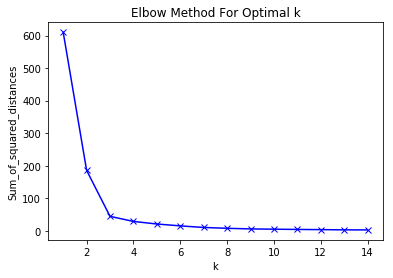

In [54]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


# Based upon the Elbow Graph it has been determine that 3 clusters is the optimal value to use

In [55]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_


In [56]:
labels

array([0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2,
       2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0,
       0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2,
       2, 1,

In [57]:
locations_to_cluster["KM Cluster"] = labels
locations_to_cluster.head(5)


,Venue Latitude,Venue Longitude,KM Cluster
167,43.657107,-79.399827,0
1346,43.847822,-79.348168,1
50,43.804938,-79.288456,2
120,43.672315,-79.387653,0
40,43.825582,-79.276038,2


# Assign cluster number to each restaurant

In [58]:
clustered_restaurants_to_map = pd.merge(GTA_restaurants_to_map, locations_to_cluster,  how='left', left_on=['Venue Latitude','Venue Longitude'], right_on = ['Venue Latitude','Venue Longitude'])
clustered_restaurants_to_map.head()

,Venue,Venue Latitude,Venue Longitude,KM Cluster
0,98 Aroma,43.657107,-79.399827,0
1,A La Kitchen 阿拉廚房,43.847822,-79.348168,1
2,Aberdeen Delicatessen 香港仔美食,43.804938,-79.288456,2
3,Aji Sai,43.672315,-79.387653,0
4,Alton Restaurant 益街坊,43.825582,-79.276038,2


# Generate map of Toronto with all restaurants clustered

In [59]:
# create a map of Toronto
map_of_toronto = folium.Map(location = [latitude, longitude], zoom_start = 10)

#add restaurant markers to the Toronto map
for lat, long, ven, clust in zip(clustered_restaurants_to_map['Venue Latitude'], 
                                 clustered_restaurants_to_map['Venue Longitude'], 
                                 clustered_restaurants_to_map['Venue'],
                                 clustered_restaurants_to_map['KM Cluster']):
    label = '{}'.format(ven)
    label = folium.Popup(label, parse_html=True)
    
    if clust == 0:
         col = 'red'
    if clust == 1:
         col = 'blue'
    if clust == 2: 
         col = 'purple'
    
    folium.CircleMarker(
        [lat, long],
        radius = 3, 
        popup = label,
        color = col,
        fill = True,
        fill_color = 'white',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_of_toronto)
        
map_of_toronto